In [53]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
df = pd.read_csv('AAPL_2006-01-01_to_2018-01-01.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


In [54]:
df1 = df.sort_values(by=['Date'])
df1['Date'] = pd.to_datetime(df1['Date'])
df1 = df1.drop(['Open', 'High', 'Low', 'Volume','Name'], axis=1)
df1.tail()

,Date,Close
3014,2017-12-22,175.01
3015,2017-12-26,170.57
3016,2017-12-27,170.60
3017,2017-12-28,171.08
3018,2017-12-29,169.23


In [55]:
df1['Value']=df1['Close']
df1 = df1.drop(['Close'], axis=1)
df1.head()

,Date,Value
0,2006-01-03,10.68
1,2006-01-04,10.71
2,2006-01-05,10.63
3,2006-01-06,10.90
4,2006-01-09,10.86


In [56]:
df1['Yearday'] = df1['Date'].dt.dayofyear
df1['Monthday'] = df1['Date'].dt.day
df1['Weekday'] = df1['Date'].dt.dayofweek
df1['Week'] = df1['Date'].dt.week
df1['Month'] = df1['Date'].dt.month
df1['Quarter'] = df1['Date'].dt.quarter
df1['Year'] = df1['Date'].dt.year

df1 = df1.set_index('Date')
df1.tail()

,Value,Yearday,Monthday,Weekday,Week,Month,Quarter,Year
Date,,,,,,,,
2017-12-22,175.01,356,22,4,51,12,4,2017
2017-12-26,170.57,360,26,1,52,12,4,2017
2017-12-27,170.60,361,27,2,52,12,4,2017
2017-12-28,171.08,362,28,3,52,12,4,2017
2017-12-29,169.23,363,29,4,52,12,4,2017


### Similarity Matrix

AxesSubplot(0.127273,0.125;0.617727x0.755)


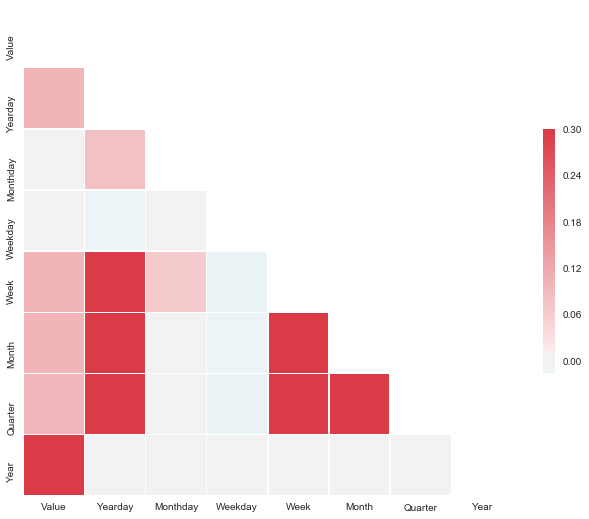

In [50]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = df1

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}))

#### This shows that there exists some sort of positive correlation between the value of the stock, and the Year, Quarter, Month, Week, and Yearday.

### Stationarization

In [26]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(3).mean()
    rolstd = timeseries.rolling(3).std()

    #Plot rolling statistics:
    orig = timeseries.plot(color='blue',label='Original')
    mean = rolmean.plot(color='red', label='Rolling Mean')
    std = rolstd.plot(color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

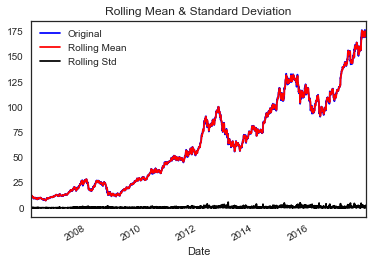

Results of Dickey-Fuller Test:
Test Statistic                    0.552367
p-value                           0.986381
#Lags Used                       22.000000
Number of Observations Used    2996.000000
Critical Value (1%)              -3.432535
Critical Value (5%)              -2.862505
Critical Value (10%)             -2.567284
dtype: float64


In [27]:
test_stationarity(df1.Value)

#### As it stands, this data is not stationarized. Stationarizing the dataset means mathematically transforming the data in some manner, so that the mean and varience stay constant over time. 

In [28]:
df1['Value']=df1['Value'].diff()
df1 = df1.dropna()

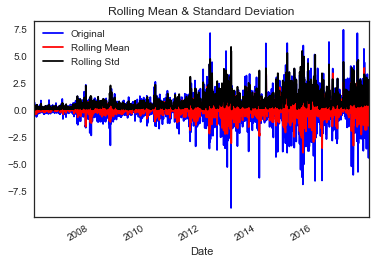

Results of Dickey-Fuller Test:
Test Statistic                -1.119569e+01
p-value                        2.309646e-20
#Lags Used                     2.100000e+01
Number of Observations Used    2.996000e+03
Critical Value (1%)           -3.432535e+00
Critical Value (5%)           -2.862505e+00
Critical Value (10%)          -2.567284e+00
dtype: float64


In [29]:
test_stationarity(df1.Value)

#### As it stands, this data is still not stationarized.

In [57]:
df1['Value']=df1['Value'].diff(3)
df1 = df1.dropna()

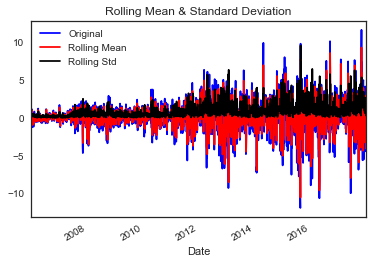

Results of Dickey-Fuller Test:
Test Statistic                -9.752063e+00
p-value                        7.967153e-17
#Lags Used                     2.800000e+01
Number of Observations Used    2.987000e+03
Critical Value (1%)           -3.432541e+00
Critical Value (5%)           -2.862508e+00
Critical Value (10%)          -2.567285e+00
dtype: float64


In [58]:
test_stationarity(df1.Value)

#### The data is stationarized here with this mathematical transform.